In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *

## Section II: Youth

In [2]:
file_path = 'data/subset_three_targets.csv'

# Load the file 
df = pd.read_csv(file_path)

In [3]:
# Create ADULT dataframe (CATAG3 == 2, 3, or 4)
ADULT = df[df['CATAG3'].isin([2,3,4])]

# Drop the YODSMMDE and DEP columns from ADULT dataframe
ADULT = ADULT.drop(['YODSMMDE', 'DEP'], axis=1)

# Create YOUTH dataframe (CATAG3 == 1)
YOUTH = df[df['CATAG3'].isin([1])]

# Drop the ADSMMDEA and DEP columns from YOUTH dataframe
YOUTH = YOUTH.drop(['ADSMMDEA', 'DEP'], axis=1)

In [4]:
# Inspect the value counts of the target variables for YOUTH
youthVC = YOUTH.YODSMMDE.value_counts()

youthVC


0    7684
1    2557
Name: YODSMMDE, dtype: int64

In [6]:
# Percent YOUTH with Depression
percent_youth_depression = round(youthVC[1]/(youthVC[0]+youthVC[1]), 2)*100 # Round to 2 decimal places

# Print
print(f"Percent of Youth with Depression: {percent_youth_depression}%")


Percent of Youth with Depression: 25.0%


### Split data set Train and test sets on YOUTH dataset


In [7]:
# Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Import SMOTE for oversampling of the minority class
from imblearn.over_sampling import SMOTE

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import train_test_split and metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [8]:
# Define X and y
X = YOUTH.drop('YODSMMDE', axis=1)
y = YOUTH['YODSMMDE']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled


In [9]:
# Instantiate a Gradient Boosting Classifier
gbt = GradientBoostingClassifier(random_state=42)

# Fit the model to the oversampled training data
gbt.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = gbt.predict(X_test_scaled)

In [10]:
# Convert X_train_resampled_scaled to dataframe for inspection
X_train_resampled_scaled_df = pd.DataFrame(X_train_resampled_scaled, columns=X_train.columns)

# Inspect X_train_resampled_scaled_df
X_train_resampled_scaled_df.head()

,CATAG3,HEALTH2,ANYHLTI2,INCOME,POVERTY3,TOBFLAG,MRJFLAG,PYUD5MRJ,MJYRTOT,ALCFLAG,COCFLAG,CRKFLAG,HERFLAG,LSDFLAG,METHAMFLAG
0,0.0,-1.239925,-0.184908,0.968621,0.767493,-0.305302,-0.414032,-0.233291,-0.216367,-0.592958,-0.047615,-0.016158,-0.027993,-0.106956,-0.040691
1,0.0,-1.239925,-0.184908,0.968621,0.767493,-0.305302,-0.414032,-0.233291,-0.216367,-0.592958,-0.047615,-0.016158,-0.027993,-0.106956,-0.040691
2,0.0,-0.137296,-0.184908,0.968621,0.767493,-0.305302,-0.414032,-0.233291,-0.216367,-0.592958,-0.047615,-0.016158,-0.027993,-0.106956,-0.040691
3,0.0,2.067962,-0.184908,-0.795494,-1.745833,-0.305302,-0.414032,-0.233291,-0.216367,1.686460,-0.047615,-0.016158,-0.027993,-0.106956,-0.040691
4,0.0,-0.137296,-0.184908,0.968621,0.767493,-0.305302,-0.414032,-0.233291,-0.216367,-0.592958,-0.047615,-0.016158,-0.027993,-0.106956,-0.040691


In [11]:
# Inspect y_train_resampled for evidence of successful resampling
y_train_resampled.value_counts()

0    5747
1    5747
Name: YODSMMDE, dtype: int64

In [12]:
# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1937
           1       0.37      0.56      0.45       624

    accuracy                           0.67      2561
   macro avg       0.60      0.63      0.60      2561
weighted avg       0.72      0.67      0.68      2561



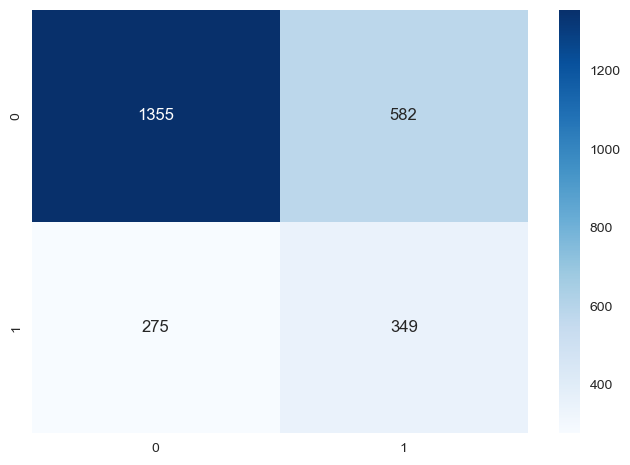

In [13]:
# Print a pretty confusion matrix
ax1 = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show(ax1)

### Split data set Train and test sets on YOUTH dataset


In [25]:
# Define X and y
X = YOUTH.drop('YODSMMDE', axis=1)
y = YOUTH['YODSMMDE']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled) # Here the resampled X_train data is scaled
X_test_scaled = scaler.transform(X_test) # Here the original X_test data is scaled as it was not resampled


In [26]:

# Create an instance of the QuadraticDiscriminantAnalysis classifier
qda = QuadraticDiscriminantAnalysis()
# Note: you do not need to scale the target variable (y).  
# Fit the model to the oversampled training data
qda.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred = qda.predict(X_test_scaled)
# Convert X_train_resampled_scaled to dataframe for inspection
X_train_resampled_scaled_df = pd.DataFrame(X_train_resampled_scaled, columns=X_train.columns)

# Inspect X_train_resampled_scaled_df
X_train_resampled_scaled_df.head()
# Inspect y_train_resampled for evidence of successful resampling
y_train_resampled.value_counts()

# Return a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1937
           1       0.00      0.00      0.00       624

    accuracy                           0.76      2561
   macro avg       0.38      0.50      0.43      2561
weighted avg       0.57      0.76      0.65      2561



## Section II: Adults

In [15]:
# import pycaret classification and init setup
s = setup(ADULT, target = 'ADSMMDEA', session_id = 123)

,Description,Value
0,Session id,123
1,Target,ADSMMDEA
2,Target type,Binary
3,Original data shape,"(20523, 16)"
4,Transformed data shape,"(20523, 16)"
5,Transformed train set shape,"(14366, 16)"
6,Transformed test set shape,"(6157, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [16]:
# Instatiate an experiment
exp = ClassificationExperiment()

In [17]:
# init setup on exp
exp.setup(ADULT, target = 'ADSMMDEA', session_id = 123)

,Description,Value
0,Session id,123
1,Target,ADSMMDEA
2,Target type,Binary
3,Original data shape,"(20523, 16)"
4,Transformed data shape,"(20523, 16)"
5,Transformed train set shape,"(14366, 16)"
6,Transformed test set shape,"(6157, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [18]:
# compare baseline models
best = compare_models()

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [19]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7998,0.0000,0.0125,0.5709,0.0243,0.0152,0.0581,0.1240
ada,Ada Boost Classifier,0.7997,0.6791,0.0399,0.4974,0.0738,0.0457,0.0950,0.1270
dummy,Dummy Classifier,0.7996,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1190
lr,Logistic Regression,0.7993,0.6789,0.0351,0.4937,0.0654,0.0398,0.0875,0.1200
lda,Linear Discriminant Analysis,0.7986,0.6780,0.0615,0.4799,0.1087,0.0665,0.1131,0.1250
gbc,Gradient Boosting Classifier,0.7984,0.6793,0.0340,0.4602,0.0632,0.0367,0.0792,0.1320
lightgbm,Light Gradient Boosting Machine,0.7971,0.6678,0.0653,0.4587,0.1141,0.0674,0.1101,0.1380
rf,Random Forest Classifier,0.7758,0.6170,0.1185,0.3360,0.1748,0.0780,0.0927,0.1510
et,Extra Trees Classifier,0.7758,0.5919,0.1237,0.3385,0.1806,0.0824,0.0966,0.1560
knn,K Neighbors Classifier,0.7683,0.5794,0.1462,0.3288,0.2016,0.0890,0.0994,0.1520


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

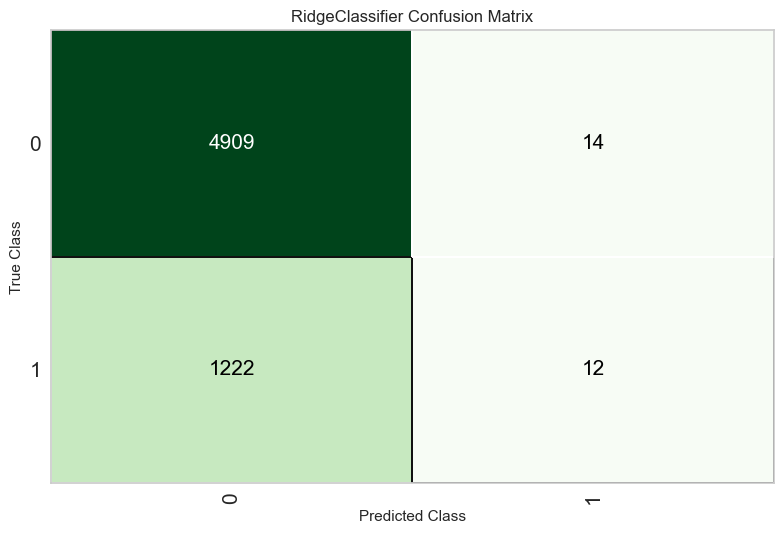

In [20]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

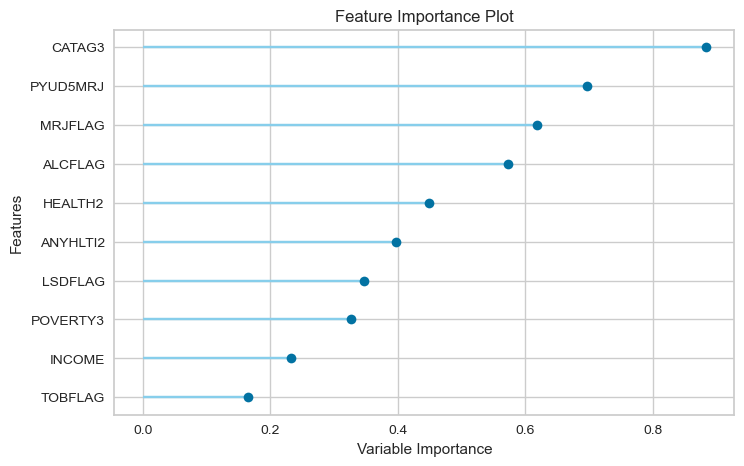

In [18]:
# plot feature importance
plot_model(best, plot = 'feature')

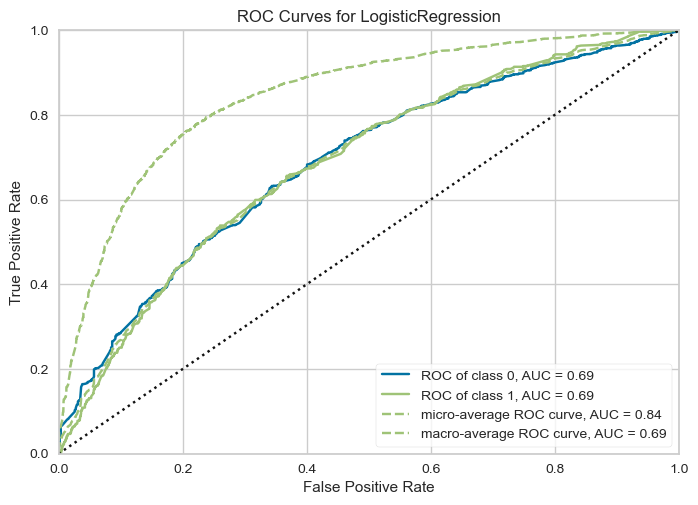

In [19]:
# plot AUC
plot_model(best, plot = 'auc')

## Section III: Senior Adults


In [20]:
# import pycaret classification and init setup
s = setup(SADULT, target = 'ADSMMDEA', session_id = 123)

,Description,Value
0,Session id,123
1,Target,ADSMMDEA
2,Target type,Binary
3,Original data shape,"(11678, 16)"
4,Transformed data shape,"(11678, 16)"
5,Transformed train set shape,"(8174, 16)"
6,Transformed test set shape,"(3504, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [21]:
# Instatiate an experiment
exp = ClassificationExperiment()

In [22]:
# init setup on exp
exp.setup(SADULT, target = 'ADSMMDEA', session_id = 123)

,Description,Value
0,Session id,123
1,Target,ADSMMDEA
2,Target type,Binary
3,Original data shape,"(11678, 16)"
4,Transformed data shape,"(11678, 16)"
5,Transformed train set shape,"(8174, 16)"
6,Transformed test set shape,"(3504, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [23]:
# compare baseline models
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8133,0.6796,0.0379,0.5422,0.0703,0.0460,0.1015,0.6470
gbc,Gradient Boosting Classifier,0.8133,0.6713,0.0464,0.5146,0.0848,0.0556,0.1091,0.1490
qda,Quadratic Discriminant Analysis,0.8129,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0920
dummy,Dummy Classifier,0.8129,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1040
ridge,Ridge Classifier,0.8126,0.0000,0.0150,0.4900,0.0290,0.0177,0.0572,0.0860
ada,Ada Boost Classifier,0.8123,0.6782,0.0405,0.4873,0.0742,0.0468,0.0949,0.1230
lda,Linear Discriminant Analysis,0.8120,0.6788,0.0733,0.5002,0.1266,0.0819,0.1319,0.1000
lightgbm,Light Gradient Boosting Machine,0.8054,0.6527,0.0641,0.3923,0.1088,0.0586,0.0904,0.2110
rf,Random Forest Classifier,0.7975,0.6160,0.1249,0.3873,0.1871,0.1042,0.1274,0.1610
knn,K Neighbors Classifier,0.7968,0.5959,0.1230,0.3751,0.1844,0.1009,0.1221,0.3850


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

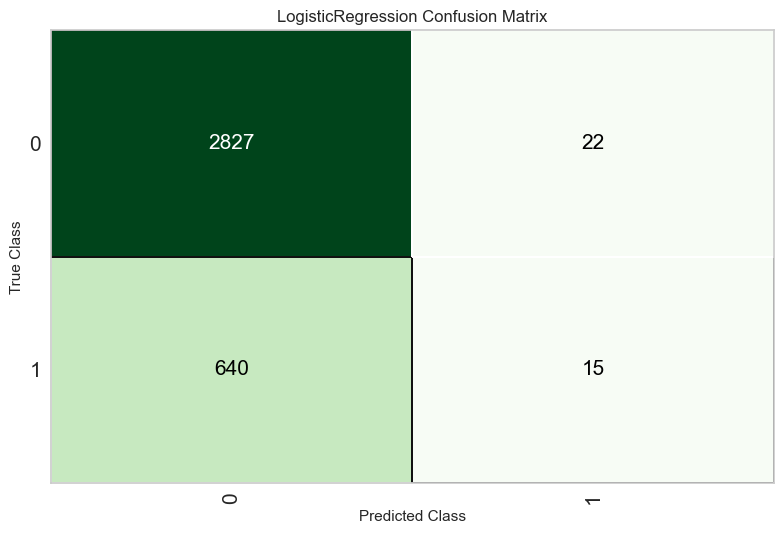

In [24]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')


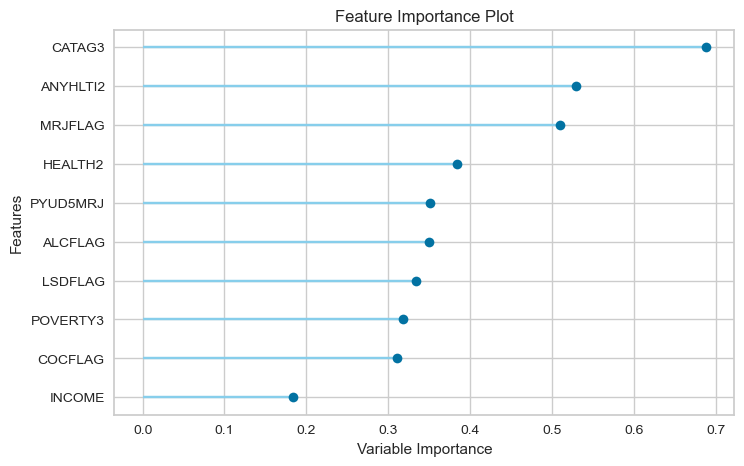

In [25]:
# plot feature importance
plot_model(best, plot = 'feature')


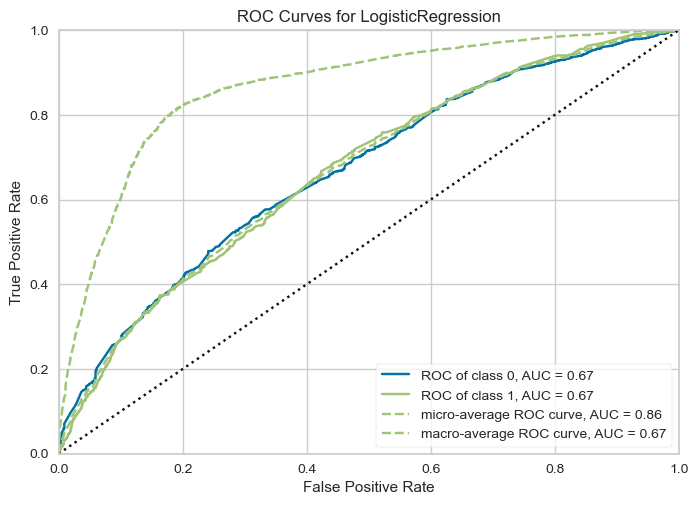

In [26]:
# plot AUC
plot_model(best, plot = 'auc')